In [142]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [143]:
df= pd.read_excel("premiums.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [144]:
df.shape

(50000, 13)

In [145]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.593480,1.712080,23.018200,15768.116320
std,15.000437,1.498248,24.219197,8419.839675
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13929.000000
75%,45.000000,3.000000,31.000000,22275.250000
max,356.000000,5.000000,930.000000,43471.000000


In [146]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [147]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [148]:
df.dropna(inplace= True)
# NA rows are too less, so drop it

In [149]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [150]:
df.duplicated().sum()
df.drop_duplicates(inplace= True)

In [151]:
df.duplicated().sum()

np.int64(0)

In [152]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [153]:
df[df.number_of_dependants < 0].shape

(72, 13)

In [154]:
df[df.number_of_dependants < 0]['number_of_dependants'].unique()

array([-3, -1])

In [155]:
df['number_of_dependants']= abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [156]:
#numeric columns
numeric_columns= df.select_dtypes(['float64', 'int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

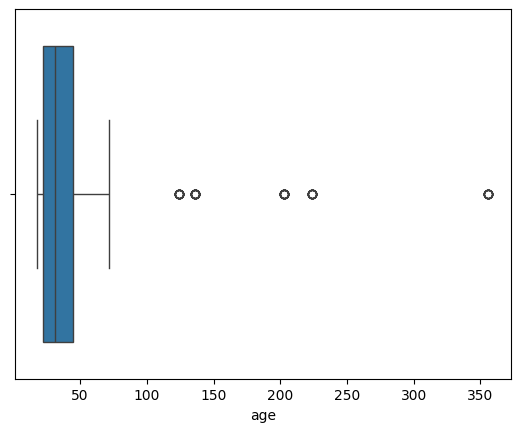

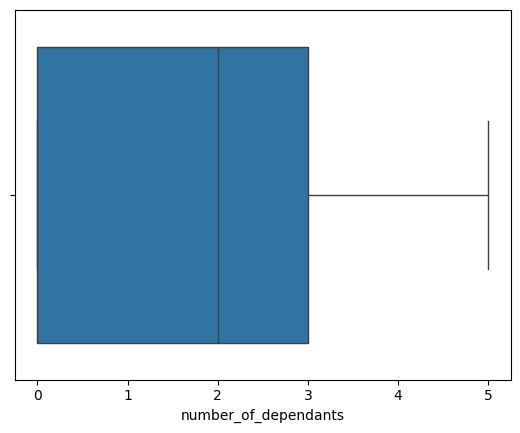

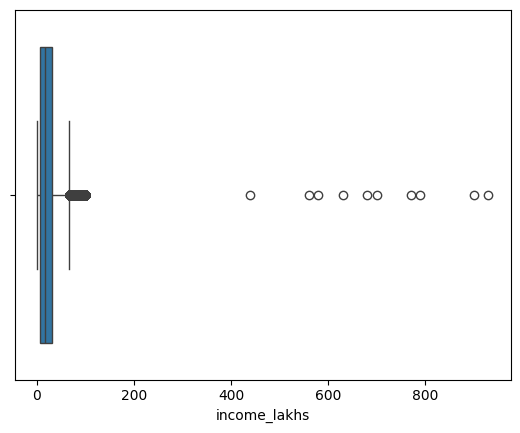

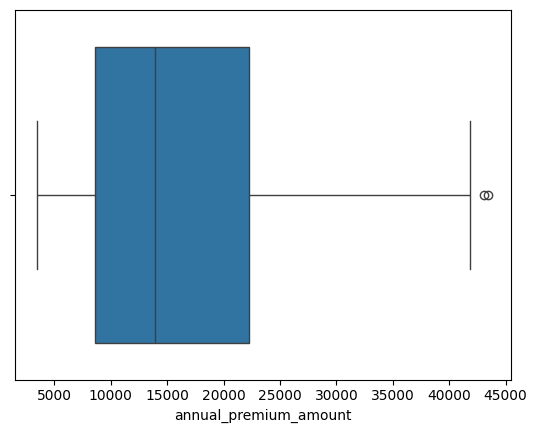

In [157]:
#To visualize outliers
for col in numeric_columns:
    sns.boxplot(x= df[col])
    plt.show()

In [158]:
df[df.age > 100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
114,224,Male,Northeast,Married,3,Normal,Regular,Salaried,25L - 40L,26,No Disease,Gold,27523
786,124,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,46,No Disease,Silver,11752
1298,124,Female,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,3,No Disease,Bronze,5311
1456,124,Female,Southwest,Unmarried,1,Overweight,No Smoking,Salaried,<10L,2,Diabetes,Bronze,10238
1470,136,Male,Southeast,Married,3,Overweight,Regular,Self-Employed,10L - 25L,15,High blood pressure,Gold,31913
1773,203,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,<10L,6,Diabetes,Bronze,8762
3658,136,Male,Southwest,Married,2,Normal,Regular,Salaried,10L - 25L,20,Diabetes & Thyroid,Gold,31402
4246,203,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,18,No Disease,Bronze,5254
5699,124,Female,Southeast,Unmarried,1,Normal,No Smoking,Self-Employed,25L - 40L,29,No Disease,Silver,10265
5951,136,Male,Southwest,Married,3,Underweight,Regular,Self-Employed,<10L,2,Heart disease,Silver,26127


In [159]:
df[df.age > 100]['age'].unique()

array([224, 124, 136, 203, 356])

In [160]:
df1= df[df.age <= 100].copy()
df1['age'].describe()

count    49918.000000
mean        34.401839
std         13.681600
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

<Axes: xlabel='income_lakhs', ylabel='Count'>

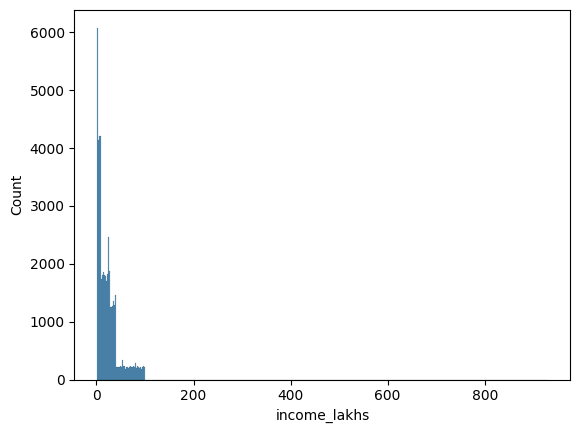

In [161]:
sns.histplot(df1.income_lakhs)

In [162]:
quantile_threshold= df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [163]:
df1[df1.income_lakhs > quantile_threshold]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
2635,51,Male,Northwest,Married,4,Obesity,No Smoking,Self-Employed,> 40L,560,High blood pressure,Gold,30692
4220,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,440,No Disease,Silver,10636
7775,35,Female,Northeast,Unmarried,0,Overweight,No Smoking,Salaried,> 40L,630,Diabetes,Gold,24010
9021,43,Male,Southeast,Married,3,Obesity,Regular,Salaried,> 40L,900,Diabetes & Thyroid,Gold,30848
10337,37,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40L,930,Diabetes,Silver,15945
10639,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,580,Thyroid,Silver,12888
11456,21,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40L,700,No Disease,Bronze,7424
15437,21,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,> 40L,790,No Disease,Silver,7586
35446,59,Male,Northwest,Married,2,Obesity,Occasional,Self-Employed,> 40L,770,Thyroid,Gold,31115
40970,48,Male,Northeast,Married,4,Obesity,No Smoking,Salaried,> 40L,680,No Disease,Gold,28926


In [164]:
df2= df1[df1.income_lakhs <= quantile_threshold].copy()
df2["income_lakhs"].describe()

count    49908.000000
mean        22.889897
std         22.170699
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

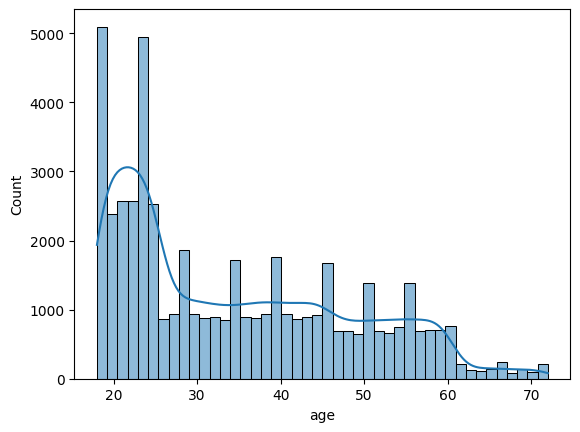

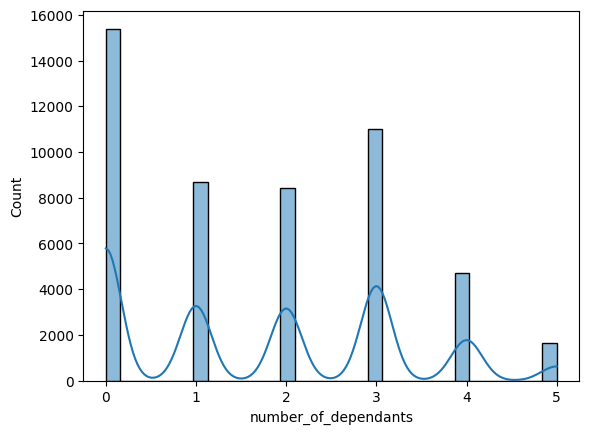

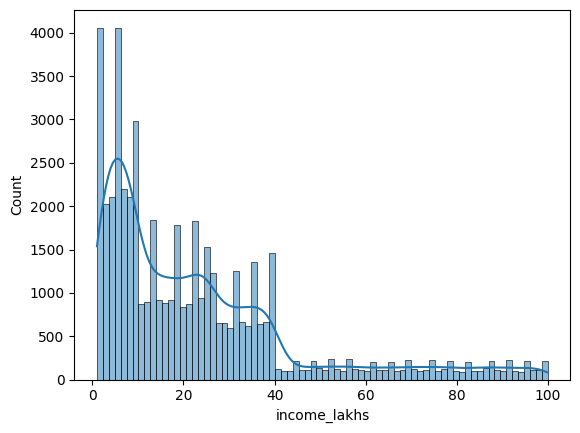

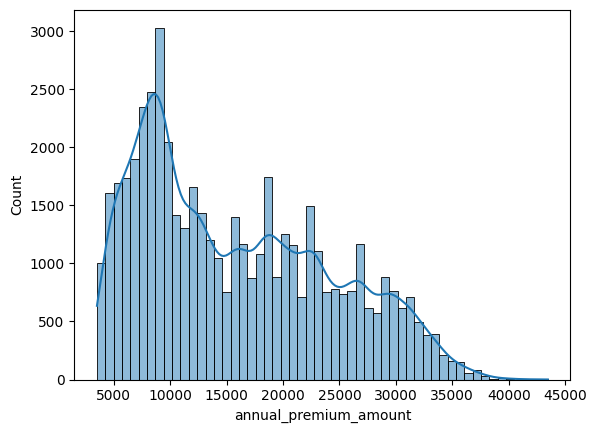

In [165]:
 for col in numeric_columns:
     sns.histplot(df2[col], kde= True)
     plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

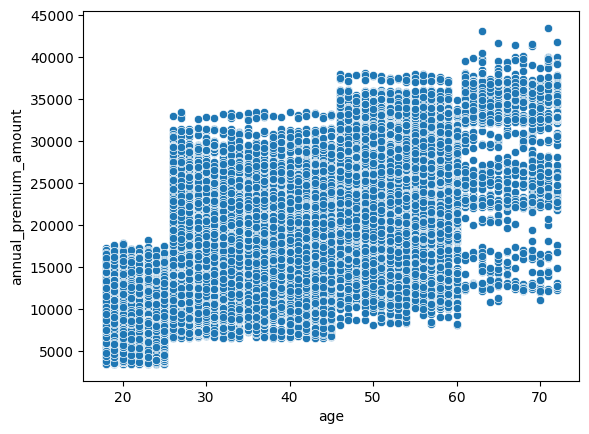

In [166]:
#bivariate
sns.scatterplot(df2, x= "age", y= "annual_premium_amount")

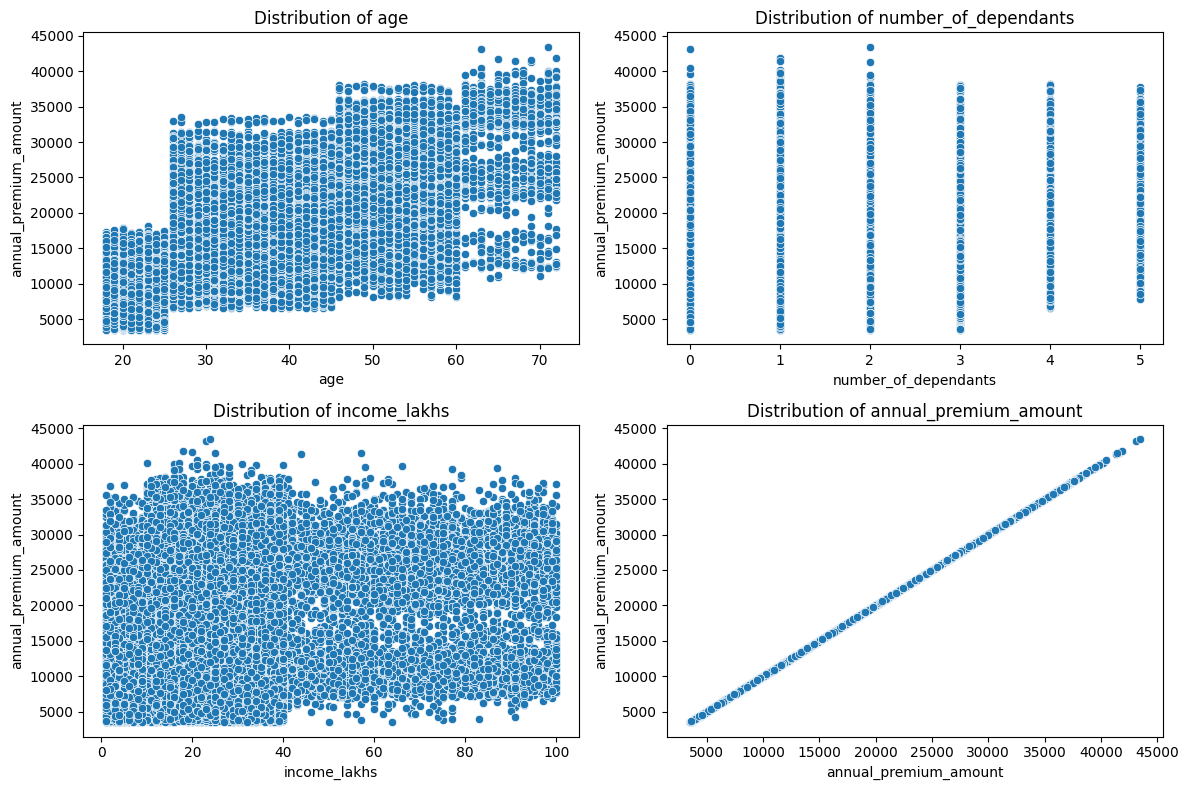

In [167]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid
axes = axes.flatten()  # Flatten to make indexing easier

for i, col in enumerate(numeric_columns[:4]):  # Limit to 4 columns for 2x2 grid
    sns.scatterplot(x=df2[col],y=df['annual_premium_amount'], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('annual_premium_amount')

plt.tight_layout()
plt.show()

# for col in numeric_columns:
#     sns.scatterplot(df2, x= col, y= "annual_premium_amount")
#     plt.show()


In [168]:
categorical_columns= df.select_dtypes(['object']).columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [169]:
for col in categorical_columns:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [170]:
df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
 'Not Smoking': 'No Smoking'
}, inplace= True)
df2['smoking_status'].unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\1678738820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [171]:
#Univariate analysis
count = df2['gender'].value_counts(normalize= True)
count

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64

In [172]:
count.index

Index(['Male', 'Female'], dtype='object', name='gender')

In [173]:
count.values

array([0.54963132, 0.45036868])

<Axes: xlabel='gender'>

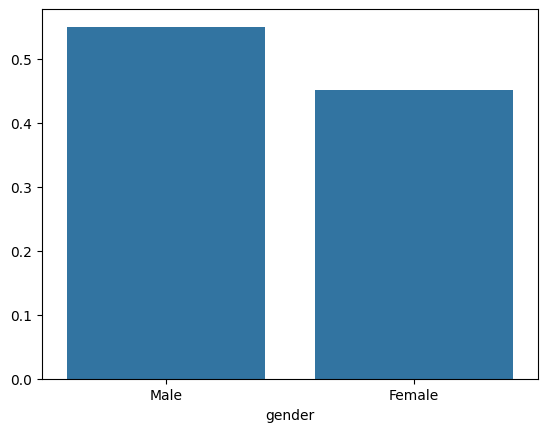

In [174]:
sns.barplot(x= count.index, y= count.values)

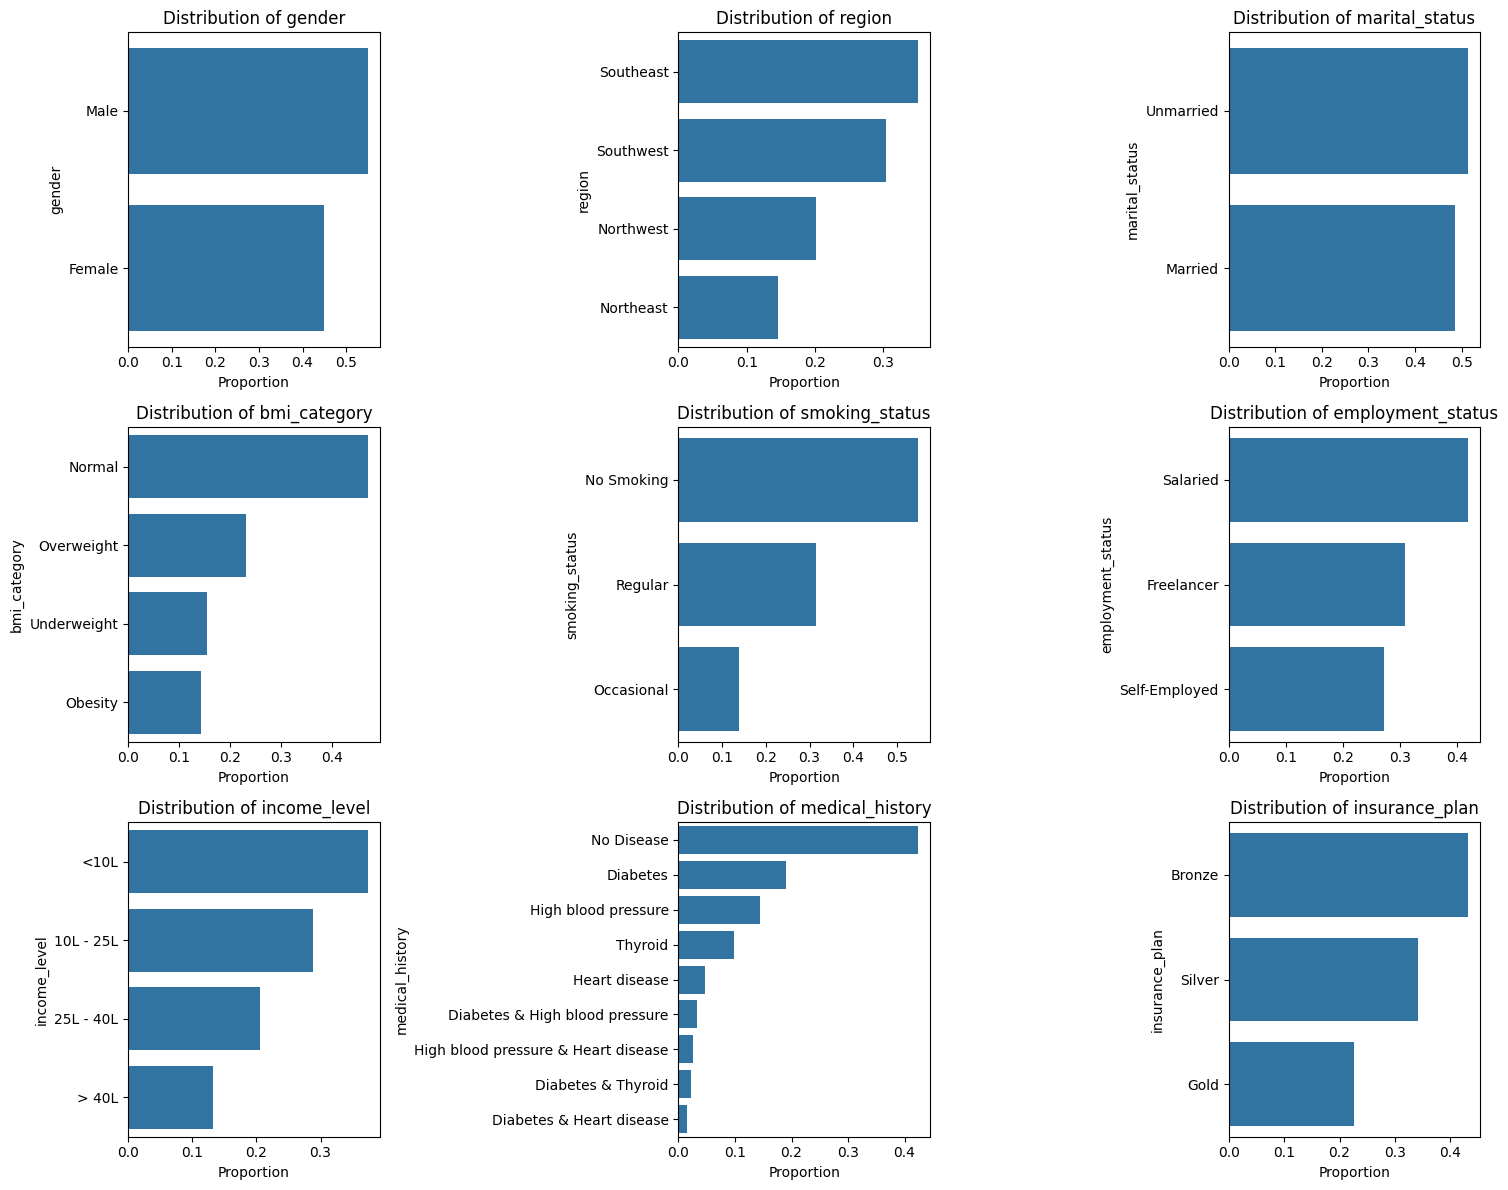

In [175]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid
axes = axes.flatten()

for i, col in enumerate(categorical_columns[:9]):  # Only up to 9 columns
    pct_count = df2[col].value_counts(normalize=True)
    sns.barplot(y=pct_count.index, x=pct_count.values, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Proportion')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


# for col in categorical_columns:
#     count= df2[col].value_counts(normalize= True)
#     sns.barplot(x= count.index, y= count.values)
#     plt.show()

In [176]:
crosstab= pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         5307  3880    5182
25L - 40L         3683  2840    3750
<10L             12226   931    5486
> 40L              329  3653    2641


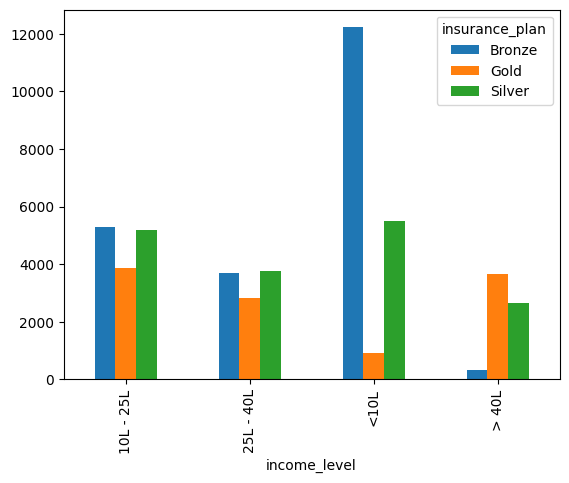

In [177]:
crosstab.plot(kind= "bar")
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

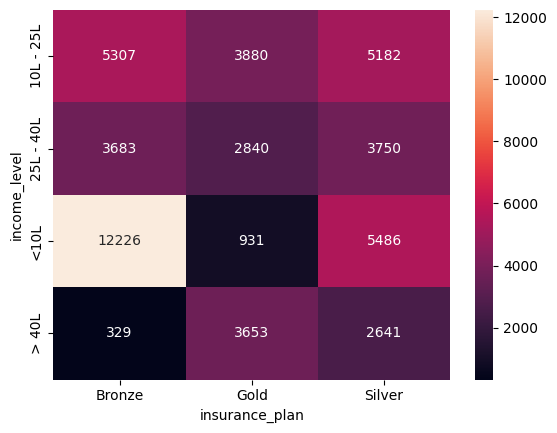

In [178]:
sns.heatmap(crosstab, annot=True, fmt= 'd')

<h3>Feature Engineering</h3>

In [179]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [180]:
df2['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [181]:


risk_score= {
    'Diabetes': 6,
    'High blood pressure': 6,
    'No Disease': 0,
    'Thyroid': 5,
    'Heart disease': 8,
    'none': 0
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand= True)
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,Diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,Diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,High blood pressure,None


In [182]:
df2['disease1'] = df2['disease1'].str.strip()
df2.head(2)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,Diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,Diabetes,None


In [183]:
df2['disease2'] = df2['disease2'].str.strip()
df2.head(2)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,Diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,Diabetes,None


In [184]:
df2['disease1'].fillna('none', inplace= True)
df2['disease2'].fillna('none', inplace = True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\927308995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace= True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\927308995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [185]:
df2['total_risk_score']= 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_score)


df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,Diabetes,none,6
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,Diabetes,none,6


In [186]:
from sklearn.preprocessing import MinMaxScaler

scale= MinMaxScaler()
df2['normalized_risk_score']= scale.fit_transform(df2[['total_risk_score']])

df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,Diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,Diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,High blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,No Disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,High blood pressure,none,6,0.428571


In [187]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [188]:
df2['insurance_plan']= df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,Diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,Diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,High blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,No Disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,High blood pressure,none,6,0.428571


In [189]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [190]:
df2['income_level']= df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '25L - 40L': 3, '> 40L': 4 })
df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,Diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,Diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,High blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,No Disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,High blood pressure,none,6,0.428571


In [191]:
nominal_columns= ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status','employment_status']
df_encode= pd.get_dummies(df2, columns= nominal_columns, drop_first= True, dtype= int)
df_encode.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,Diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,Diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,High blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,No Disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,High blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [192]:
df_encode.drop(["medical_history", "disease1", "disease2", "total_risk_score"], axis= 1, inplace= True)


In [193]:
df_encode.dtypes

age                                  int64
number_of_dependants                 int64
income_level                         int64
income_lakhs                         int64
insurance_plan                       int64
annual_premium_amount                int64
normalized_risk_score              float64
gender_Male                          int64
region_Northwest                     int64
region_Southeast                     int64
region_Southwest                     int64
marital_status_Unmarried             int64
bmi_category_Obesity                 int64
bmi_category_Overweight              int64
bmi_category_Underweight             int64
smoking_status_Occasional            int64
smoking_status_Regular               int64
employment_status_Salaried           int64
employment_status_Self-Employed      int64
dtype: object

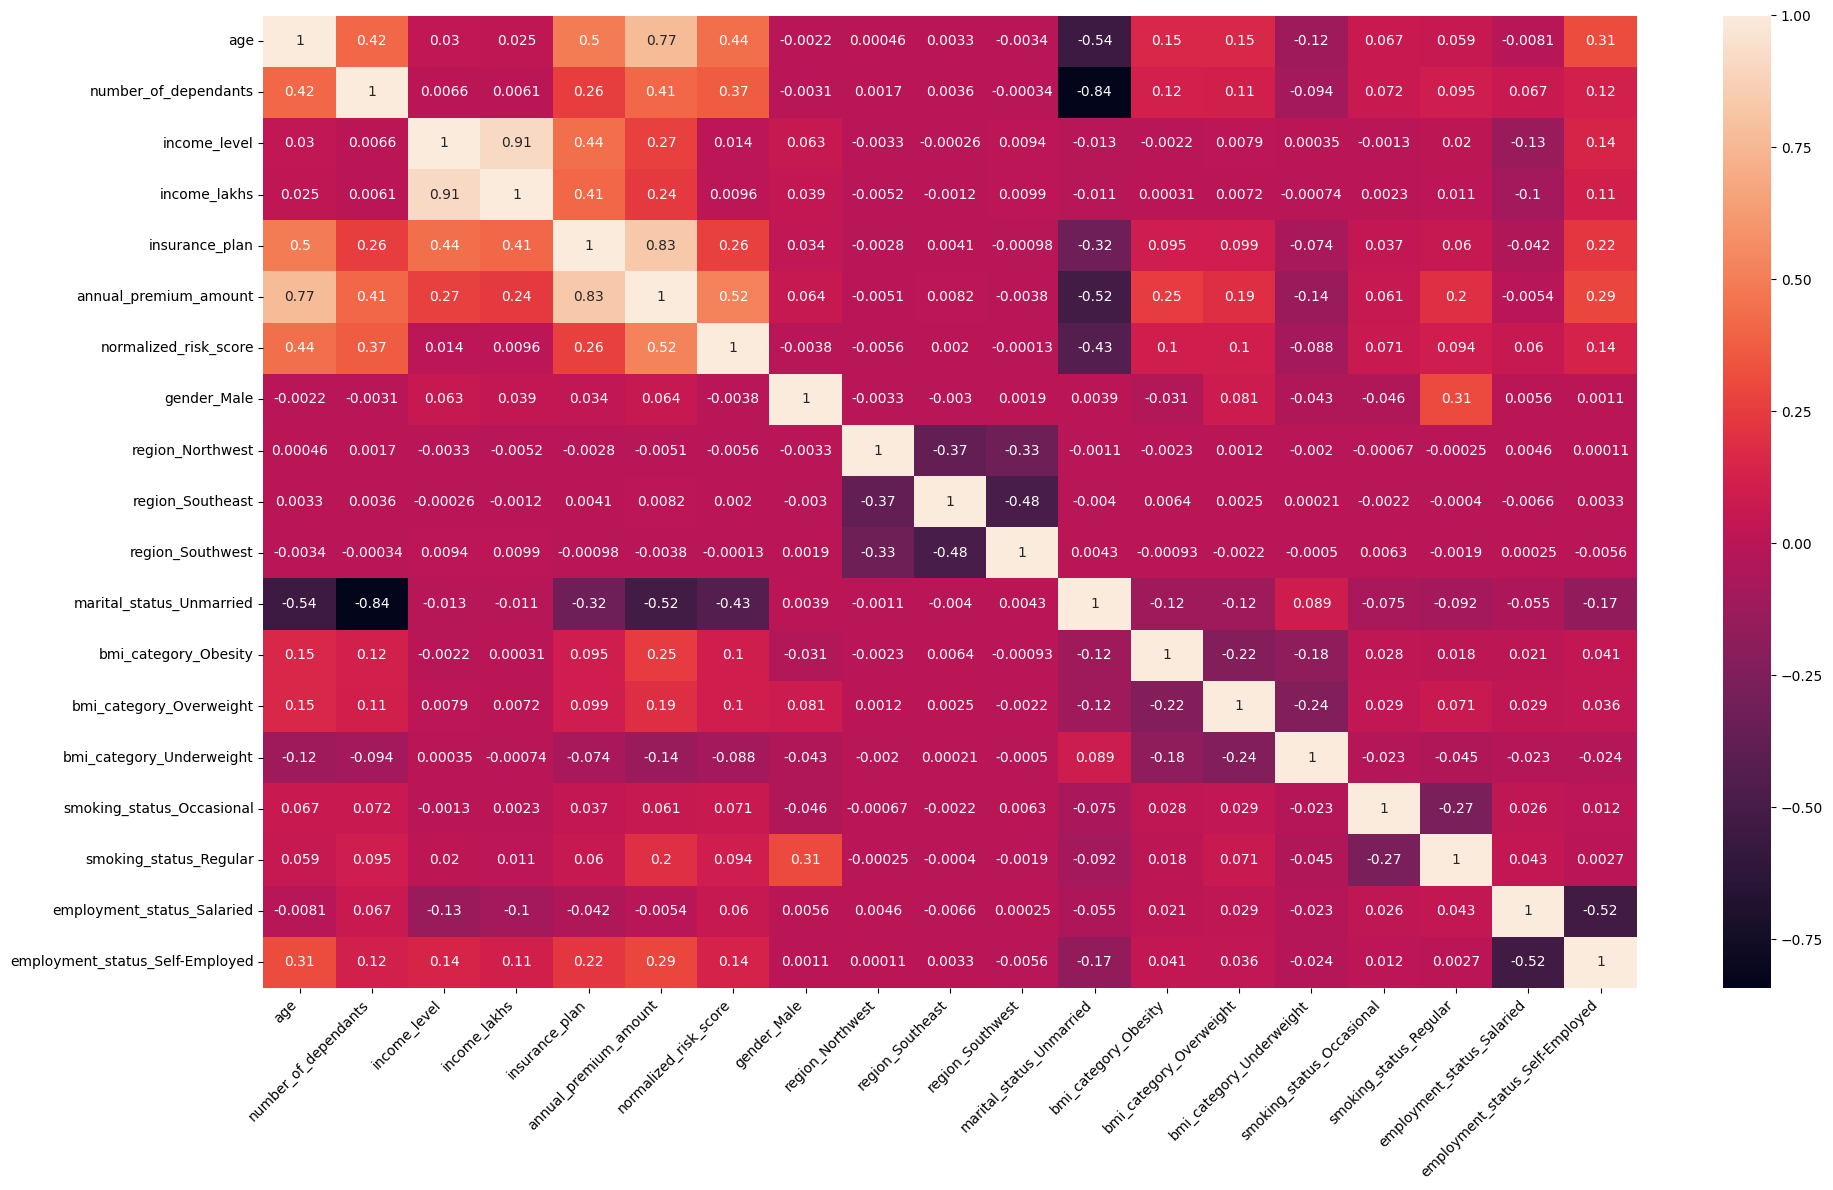

In [194]:

cm=df_encode.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [195]:
df_encode.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [196]:
X= df_encode.drop("annual_premium_amount", axis= "columns")
y= df_encode["annual_premium_amount"]

from sklearn.preprocessing import MinMaxScaler
cols= ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scale= MinMaxScaler()

X[cols]= scale.fit_transform(X[cols])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):
    vif= pd.DataFrame()
    vif['Column']= data.columns
    vif['VIF'] =  [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif


In [198]:
calc_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_risk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [206]:
calc_vif(X.drop('income_level',axis=1))

,Column,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_risk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [207]:
X.drop('income_level',axis=1, inplace= True)
X.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


<h3>Model Training</h3>

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 10)

X_train.shape

(34935, 17)

In [209]:
from sklearn.linear_model import LinearRegression

model_lr= LinearRegression()
model_lr.fit(X_train, y_train)

train_score = model_lr.score(X_train, y_train)
test_score= model_lr.score(X_test, y_test)

print(train_score, test_score)

0.9282143576916762 0.9280547230217837


In [210]:
X.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0


In [211]:
model_lr.intercept_


np.float64(4824.300272127088)

In [212]:
model_lr.coef_

array([11160.92646188,  -676.44399066,  -514.22981577, 12557.01293645,
        4810.35770228,   168.64666183,   -35.7192924 ,    39.96512973,
         -24.65292857,  -935.76061134,  3387.91145477,  1599.36226775,
         391.1713038 ,   735.91227798,  2234.8047119 ,   155.9846743 ,
         415.90397305])

In [213]:
feature_imp= model_lr.coef_

coef_df= pd.DataFrame(feature_imp, index= X_test.columns, columns= ["Coefficients"])
coef_df= coef_df.sort_values(by= "Coefficients", ascending= True)
coef_df

,Coefficients
marital_status_Unmarried,-935.760611
number_of_dependants,-676.443991
income_lakhs,-514.229816
region_Northwest,-35.719292
region_Southwest,-24.652929
region_Southeast,39.965130
employment_status_Salaried,155.984674
gender_Male,168.646662
bmi_category_Underweight,391.171304
employment_status_Self-Employed,415.903973


<Axes: xlabel='Coefficients', ylabel='None'>

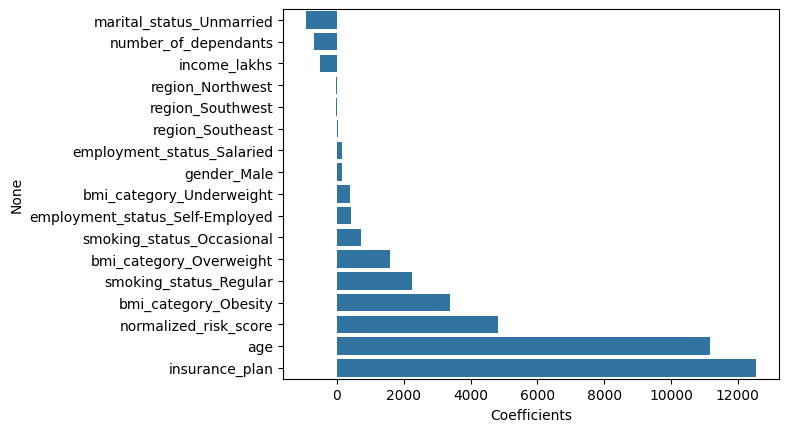

In [214]:
sns.barplot(y=coef_df.index,x=coef_df['Coefficients'])

In [215]:
from sklearn.linear_model import Ridge, Lasso

ridge= Ridge()
ridge.fit(X_train, y_train)

train_score= ridge.score(X_train, y_train)
test_score= ridge.score(X_test, y_test)
train_score, test_score

(0.9282143198366275, 0.9280541644640345)

In [229]:
from xgboost import XGBRegressor

xgb= XGBRegressor()
xgb.fit(X_train, y_train)

train_score= xgb.score(X_train, y_train)
test_score= xgb.score(X_test, y_test)
train_score, test_score


(0.9860964417457581, 0.9809534549713135)

In [230]:
from sklearn.metrics import  mean_squared_error, r2_score, root_mean_squared_error
y_pred= xgb.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print("mse: ",mse, ", r2_score: ", r2)

mse:  1367525.625 , r2_score:  0.9809534549713135


In [220]:
from sklearn.model_selection import RandomizedSearchCV

xgb= XGBRegressor()

params= {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

model = RandomizedSearchCV(xgb, params, n_iter= 10, cv= 3, scoring='r2')
model.fit(X_train, y_train)
model.best_score_

np.float64(0.9817558725674947)

In [221]:
model.best_params_

{'n_estimators': 40, 'max_depth': 5, 'learning_rate': 0.2}

In [222]:
best_model= model.best_estimator_

In [226]:
feature_imp= best_model.feature_importances_

coef_df= pd.DataFrame(feature_imp, index= X_test.columns ,columns=['Coefficients'])
coef_df= coef_df.sort_values(by= "Coefficients", ascending= True)
coef_df



,Coefficients
employment_status_Self-Employed,0.000014
region_Southeast,0.000118
marital_status_Unmarried,0.000121
number_of_dependants,0.000153
employment_status_Salaried,0.000187
income_lakhs,0.000205
gender_Male,0.000215
region_Southwest,0.000228
region_Northwest,0.000232
bmi_category_Underweight,0.001266


<Axes: xlabel='Coefficients', ylabel='None'>

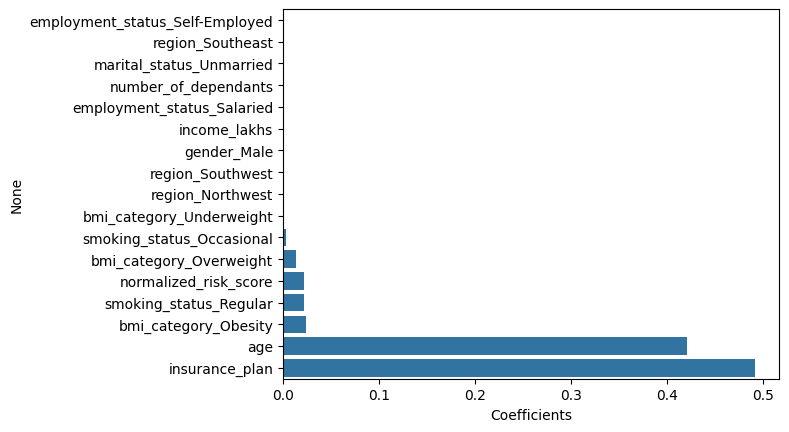

In [227]:
sns.barplot(y=coef_df.index,x=coef_df['Coefficients'])

<h3>Error Analysis</h3>

In [231]:
y_pred= best_model.predict(X_test)

residuals= y_pred- y_test
residuals_pct= residuals* 100/ y_test

results_df= pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
})

results_df.head()

,actual,predicted,diff,diff_pct
3598,20554,20576.011719,22.011719,0.107092
35794,29647,29390.083984,-256.916016,-0.866584
43608,20560,20616.943359,56.943359,0.276962
42730,5018,6943.274902,1925.274902,38.367375
18936,8929,7937.507812,-991.492188,-11.104179


<Axes: xlabel='diff_pct', ylabel='Count'>

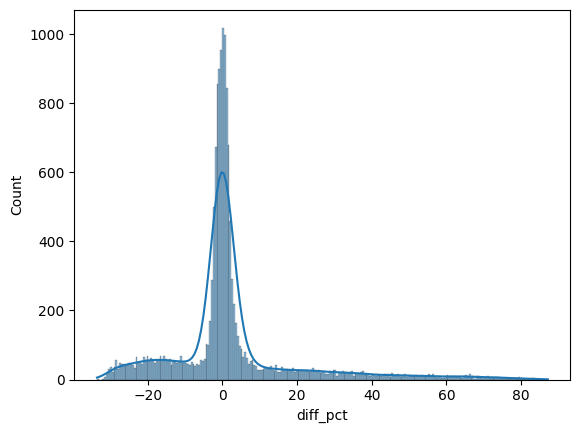

In [232]:
sns.histplot(results_df['diff_pct'], kde= True)

In [234]:
#should not have error more than 10pct
extreme_error_threshold= 10

results_df_extreme= results_df[np.abs(results_df.diff_pct) > extreme_error_threshold]
results_df_extreme.shape

(4412, 4)

In [235]:
results_df_extreme.shape[0]*100/ results_df.shape[0]

29.46637280438122

In [237]:
results_df[np.abs(results_df.diff_pct) > 50].sort_values('diff_pct', ascending= False)

,actual,predicted,diff,diff_pct
36269,3501,6553.415527,3052.415527,87.186962
42342,3521,6553.415527,3032.415527,86.123701
18564,3523,6529.975586,3006.975586,85.352699
9118,3536,6550.295898,3014.295898,85.245925
48801,3516,6510.037109,2994.037109,85.154639
...,...,...,...,...
47179,4725,7100.658691,2375.658691,50.278491
27859,5162,7756.020996,2594.020996,50.252247
43990,4748,7129.710449,2381.710449,50.162394
23743,4675,7014.699219,2339.699219,50.047042


In [238]:
results_df_extreme.index

Index([42730, 18936, 20029,  4294, 44419,  6707, 11728, 15740, 35065,  9654,
       ...
        3036, 36158, 30386, 21184, 45020,  8767, 25179, 21592, 49274, 27977],
      dtype='int64', length=4412)

In [240]:
ext_error_df= X_test.loc[results_df_extreme.index]
ext_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42730,0.092593,0.2,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0
18936,0.074074,0.0,0.202020,0.0,0.428571,1,0,0,1,1,0,1,0,0,1,0,1
20029,0.018519,0.2,0.030303,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,1,0
4294,0.000000,0.2,0.020202,0.0,0.000000,1,0,0,1,1,0,1,0,0,0,0,0
44419,0.055556,0.0,0.242424,0.0,0.000000,0,0,0,0,1,0,0,1,0,0,0,0


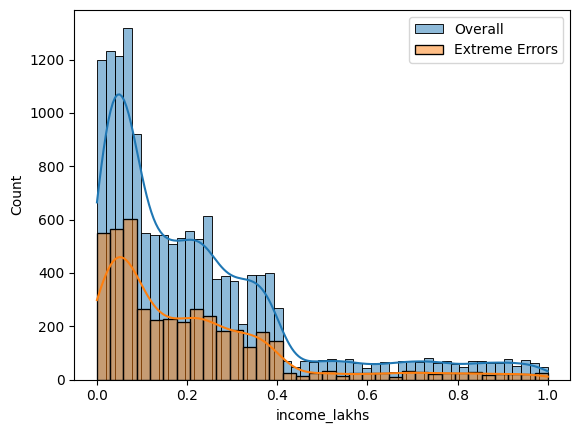

In [242]:
#side by side plot of X_test, ext_error_df
#lets take for income first
sns.histplot(X_test.income_lakhs, label= "Overall", kde= True)
sns.histplot(ext_error_df.income_lakhs, label= "Extreme Errors" ,kde= True)
plt.legend()
plt.show()

###Distribution shape is similar, so can say that errors are spread in a equal fashion among all income groups

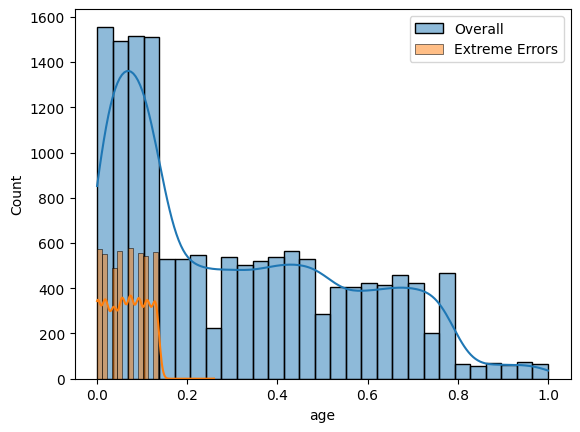

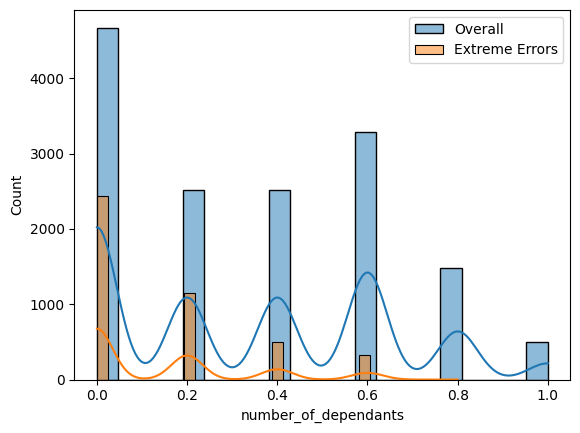

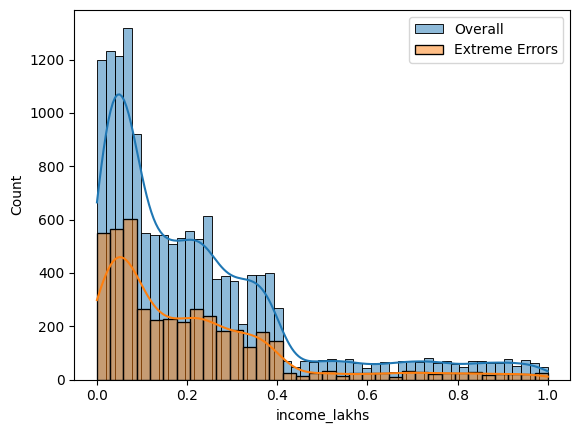

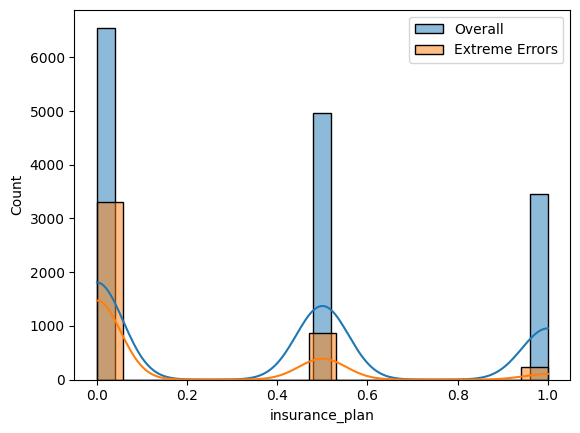

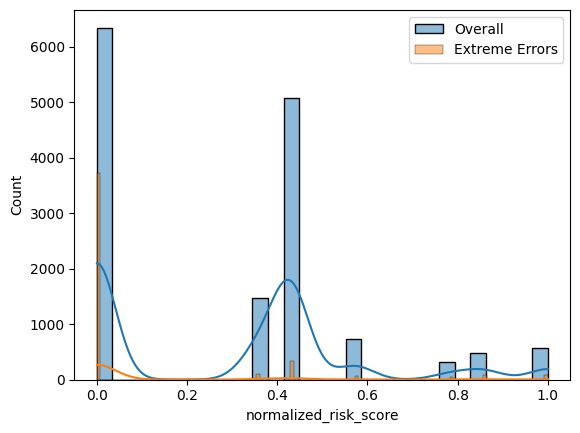

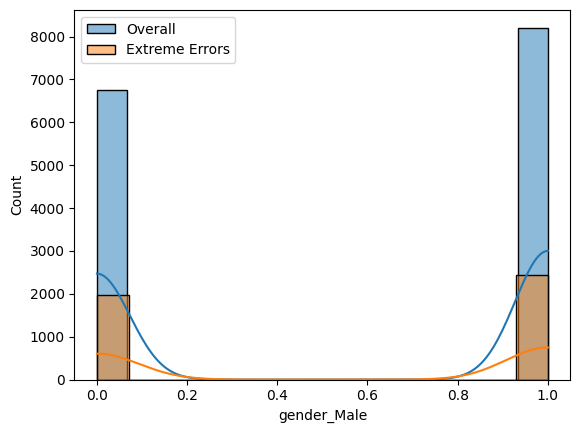

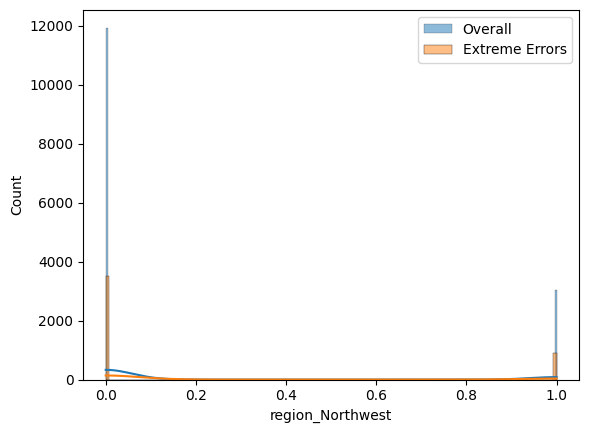

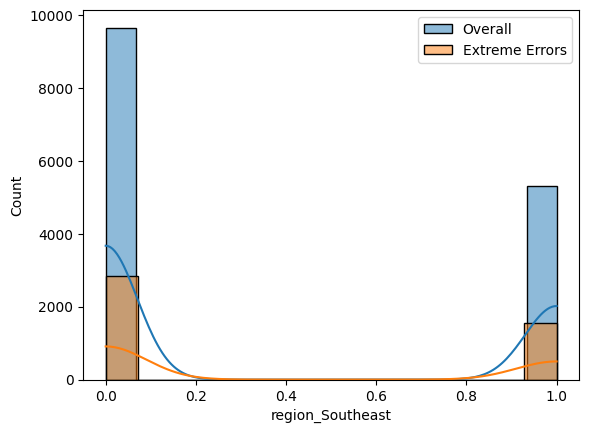

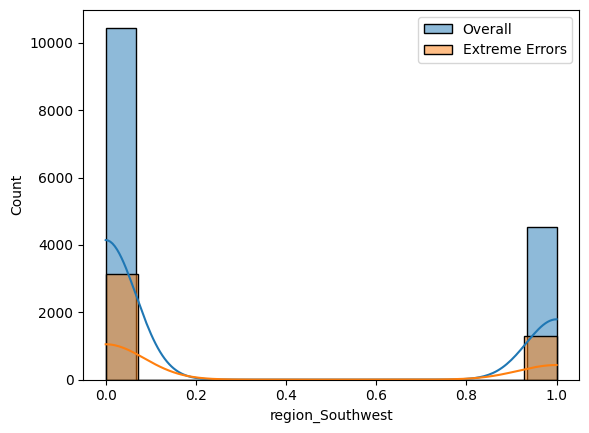

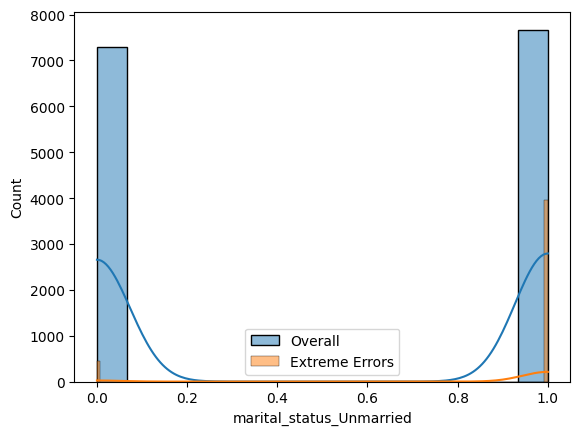

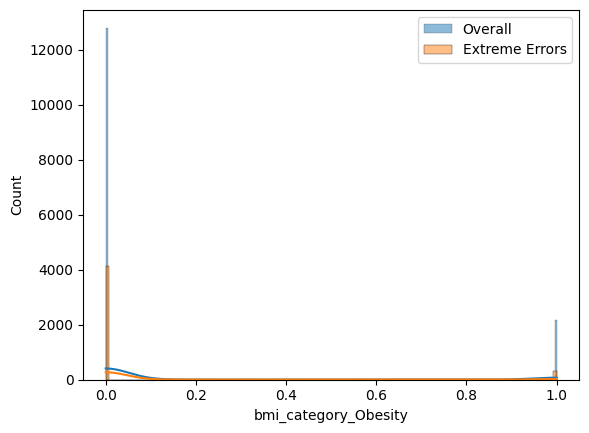

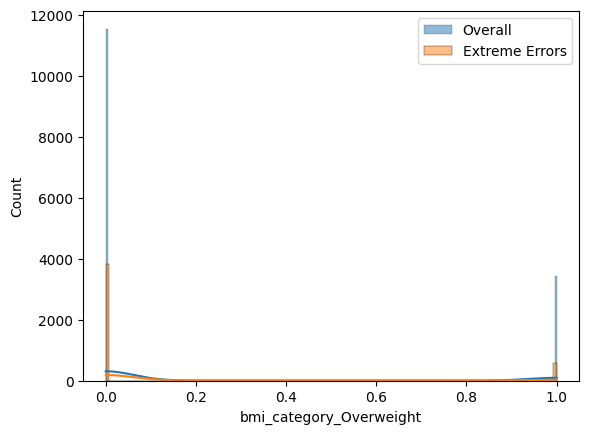

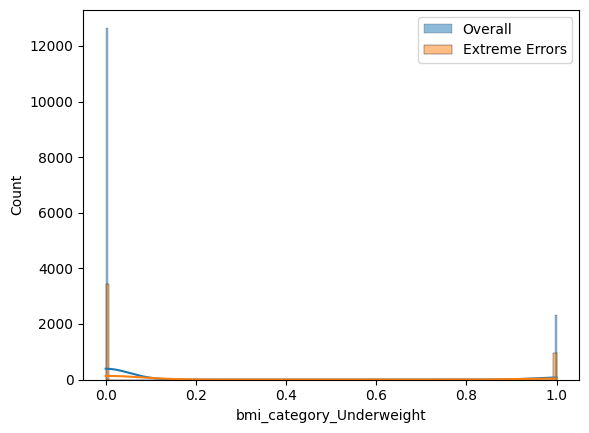

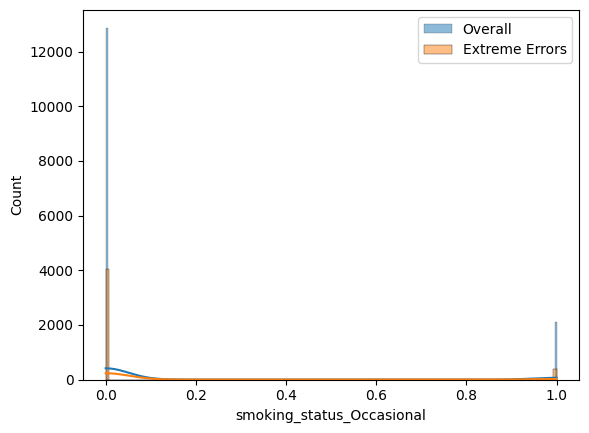

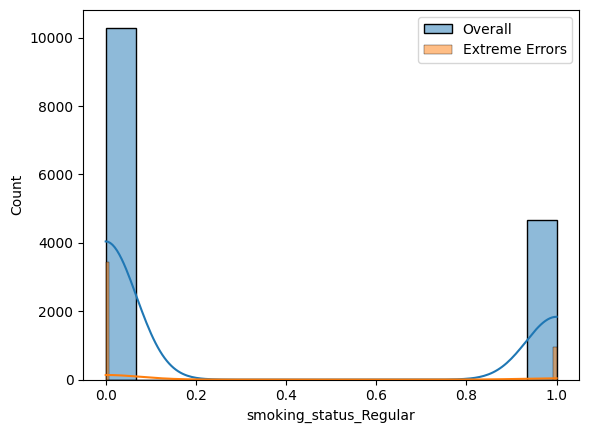

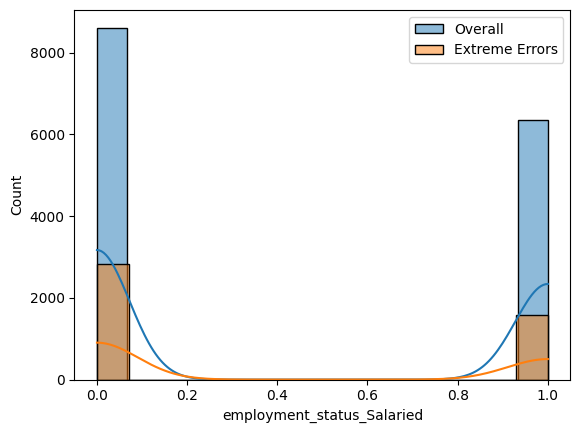

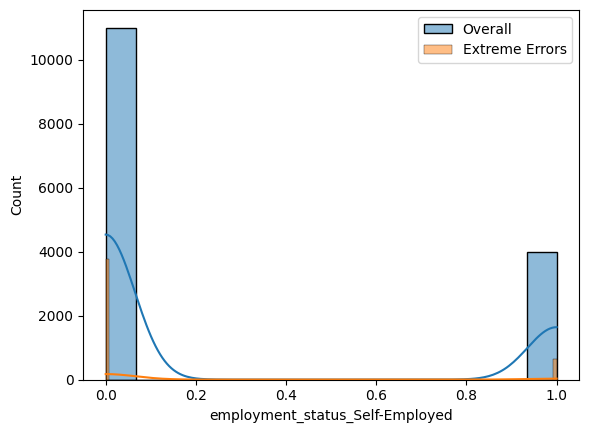

In [244]:
for feature in X.columns:
    sns.histplot(X_test[feature], label= "Overall", kde= True)
    sns.histplot(ext_error_df[feature], label= "Extreme Errors" ,kde= True)
    plt.legend()
    plt.show()
    

###Age grp is having errors in low age groups

In [247]:
cols

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [248]:
ext_error_df.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [249]:
ext_error_df['income_level']= -1
# remember, we dropped income level

In [251]:
df_reversed= pd.DataFrame()
df_reversed[cols]= scale.inverse_transform(ext_error_df[cols])

In [252]:
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,1.0,-2.0,14.0,1.0
1,22.0,0.0,-2.0,21.0,1.0
2,19.0,1.0,-2.0,4.0,1.0
3,18.0,1.0,-2.0,3.0,1.0
4,21.0,0.0,-2.0,25.0,1.0


<Axes: xlabel='age', ylabel='Count'>

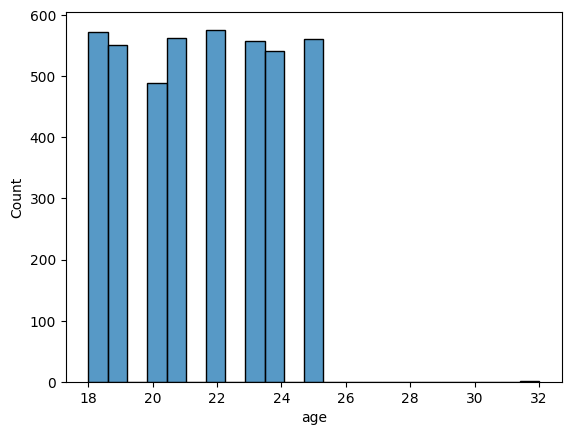

In [253]:
sns.histplot(df_reversed['age'])

In [254]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,4412.000000,4412.000000,4412.0,4412.000000,4412.000000
mean,21.513146,0.706482,-2.0,21.461242,1.304397
std,2.306105,0.934598,0.0,20.723889,0.564216
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,19.000000,0.000000,-2.0,6.000000,1.000000
50%,22.000000,0.000000,-2.0,15.500000,1.000000
75%,24.000000,1.000000,-2.0,30.000000,2.000000
max,32.000000,4.000000,-2.0,100.000000,3.000000
